# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
df.shape

(303, 15)

In [5]:
tab = pd.crosstab(df['sex'],(df['flag_doente']).astype(int),margins=True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [6]:
tab['perc_sex'] = tab[1]/tab['All']
tab

flag_doente,0,1,All,perc_sex
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [7]:
tab['chance'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,perc_sex,chance
sex,,,,,
0.0,72,25,97,0.257732,0.347222
1.0,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [8]:
tab['odds_ratio_all'] = tab['chance']/tab.loc['All','chance']
tab

flag_doente,0,1,All,perc_sex,chance,odds_ratio_all
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [9]:
tab['logito'] = np.log(tab['chance'])
tab

flag_doente,0,1,All,perc_sex,chance,odds_ratio_all,logito
sex,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [10]:
tab['WOE'] = np.log(tab['odds_ratio_all'])
tab

flag_doente,0,1,All,perc_sex,chance,odds_ratio_all,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [16]:
df.age.unique()

array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
       71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
       74., 76.])

In [32]:
array_age = df.age.unique()
array_age.sort()           
array_age

array([29., 34., 35., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.,
       60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 74.,
       76., 77.])

In [35]:
sep = np.linspace(array_age.min(),array_age.max(),6)
sep

array([29. , 38.6, 48.2, 57.8, 67.4, 77. ])

In [36]:
df.loc[(df['age'] >= 29)&(df['age'] < 38),'Cat_age'] = "Entre 29 e 37"
df.loc[(df['age'] >= 38)&(df['age'] < 48),'Cat_age'] = "Entre 38 e 47" 
df.loc[(df['age'] >= 48)&(df['age'] < 57),'Cat_age'] = "Entre 48 e 56"
df.loc[(df['age'] >= 57)&(df['age'] < 67),'Cat_age'] = "Entre 57 e 66"
df.loc[(df['age'] >= 67),'Cat_age'] = "Acima de 66"


In [37]:
df[['age','Cat_age']]

,age,Cat_age
0,63.0,Entre 57 e 66
1,67.0,Acima de 66
2,67.0,Acima de 66
3,37.0,Entre 29 e 37
4,41.0,Entre 38 e 47
...,...,...
298,45.0,Entre 38 e 47
299,68.0,Acima de 66
300,57.0,Entre 57 e 66
301,57.0,Entre 57 e 66


In [42]:
tab2 = pd.crosstab(df['Cat_age'],df['flag_doente'],margins=True)
tab2

flag_doente,0,1,All
Cat_age,,,
Acima de 66,13,13,26
Entre 29 e 37,7,2,9
Entre 38 e 47,47,19,66
Entre 48 e 56,53,34,87
Entre 57 e 66,44,71,115
All,164,139,303


In [45]:
tab2['perc_age'] = tab2[1]/tab2['All']
tab2['chance'] = tab2[1]/tab2[0]
tab2['odds_ratio_all'] = tab2['chance']/tab2.loc['All','chance']
tab2['logito'] = np.log(tab2['chance'])
tab2['WOE'] = np.log(tab2['odds_ratio_all'])
tab2

flag_doente,0,1,All,perc_age,chance,odds_ratio_all,logito,WOE
Cat_age,,,,,,,,
Acima de 66,13,13,26,0.500000,1.000000,1.179856,0.000000,0.165392
Entre 29 e 37,7,2,9,0.222222,0.285714,0.337102,-1.252763,-1.087370
Entre 38 e 47,47,19,66,0.287879,0.404255,0.476963,-0.905709,-0.740316
Entre 48 e 56,53,34,87,0.390805,0.641509,0.756889,-0.443931,-0.278539
Entre 57 e 66,44,71,115,0.617391,1.613636,1.903859,0.478490,0.643883
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

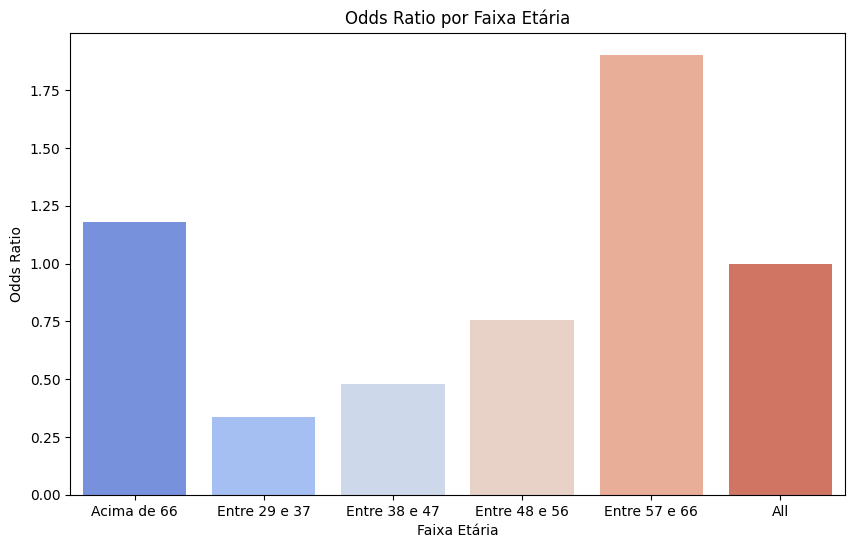

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=tab2.index, y='odds_ratio_all', data=tab2, palette='coolwarm',hue=tab2.index)
plt.title('Odds Ratio por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Odds Ratio')
plt.show()

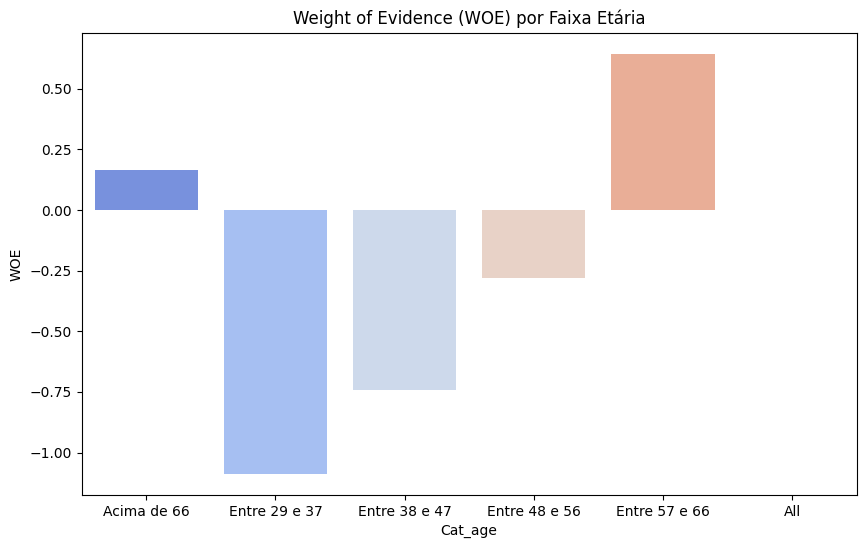

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x=tab2.index, y='WOE', data=tab2, palette='coolwarm',hue=tab2.index)
plt.title('Weight of Evidence (WOE) por Faixa Etária')
plt.show()

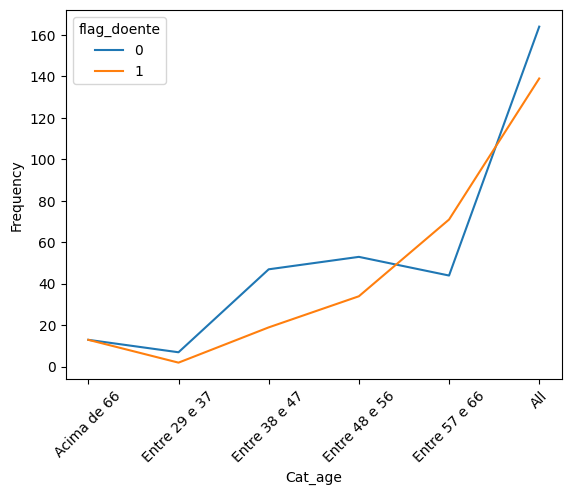

In [75]:
tab2[[0,1]].plot()
plt.xticks(rotation=45)
plt.ylabel("Frequency");plt.show()

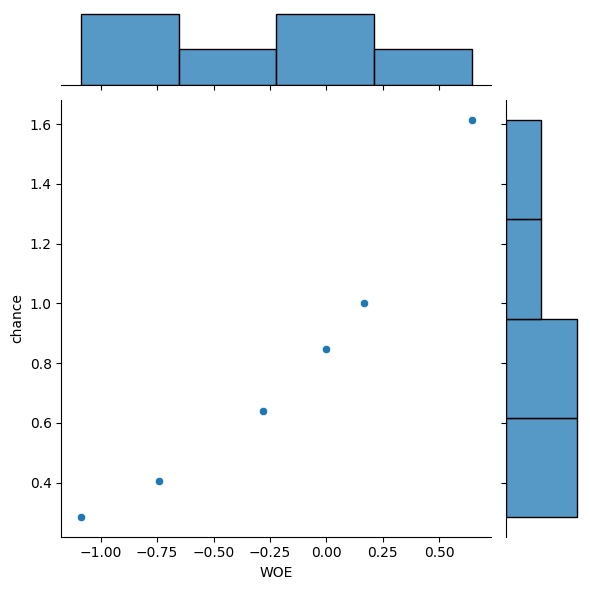

In [72]:
sns.jointplot(data=tab2,x='WOE',y='chance')

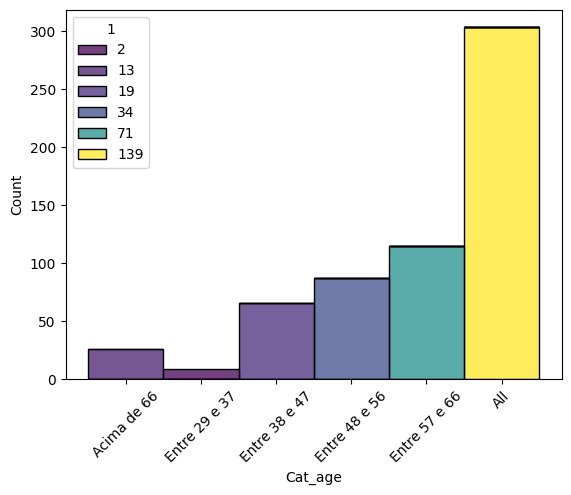

In [87]:
sns.histplot(data=tab2.rename(columns={0:'0',1:'1'}), x=tab2.index, hue='1', weights='All', multiple='stack', palette='viridis')
plt.xticks(rotation=45);

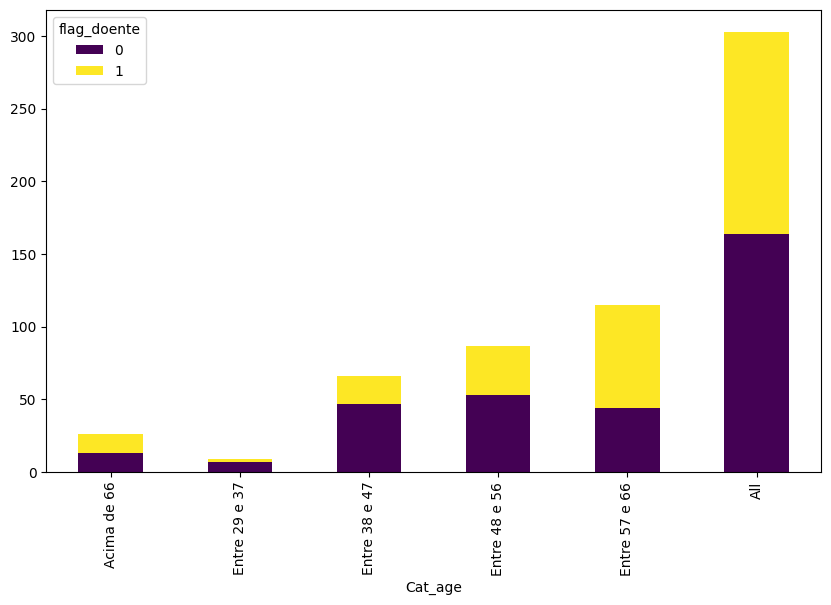

In [105]:
ax = tab2[[0, 1]].plot.bar(stacked=True, figsize=(10, 6), colormap='viridis')

<Axes: xlabel='Cat_age', ylabel='count'>

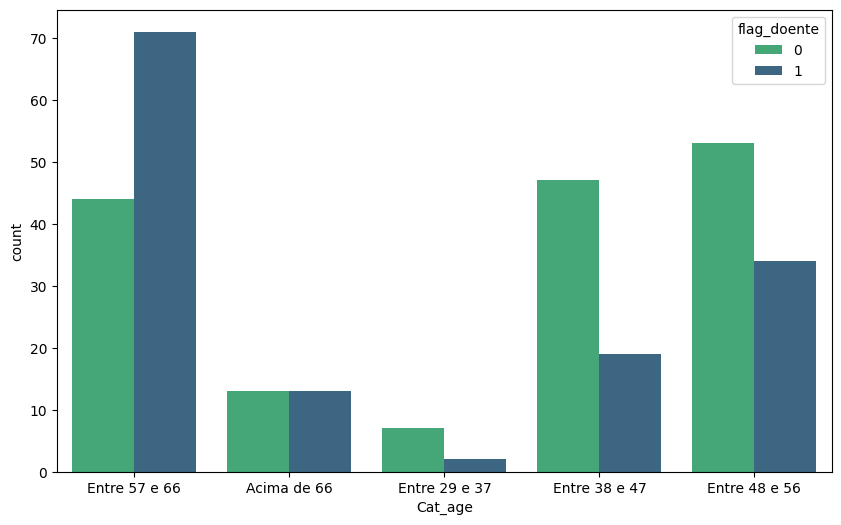

In [115]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Cat_age',hue='flag_doente',palette='viridis_r');

In [126]:
tab2

flag_doente,0,1,All,perc_age,chance,odds_ratio_all,logito,WOE
Cat_age,,,,,,,,
Acima de 66,13,13,26,0.500000,1.000000,1.179856,0.000000,0.165392
Entre 29 e 37,7,2,9,0.222222,0.285714,0.337102,-1.252763,-1.087370
Entre 38 e 47,47,19,66,0.287879,0.404255,0.476963,-0.905709,-0.740316
Entre 48 e 56,53,34,87,0.390805,0.641509,0.756889,-0.443931,-0.278539
Entre 57 e 66,44,71,115,0.617391,1.613636,1.903859,0.478490,0.643883
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


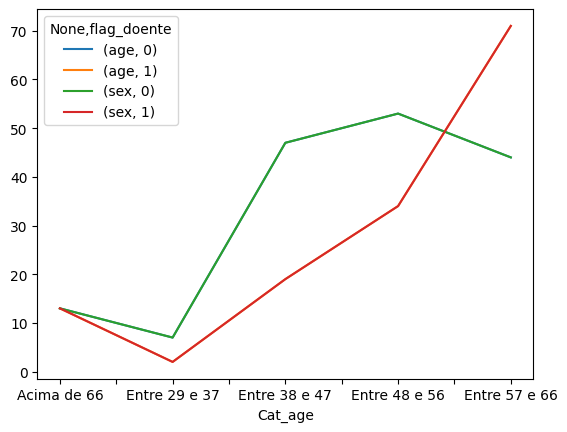

In [132]:
df.groupby(['Cat_age','flag_doente'])[['age','sex']].count().unstack().plot();